In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [4]:
data_frame = pd.read_csv('supervised.csv')

n = 65

a1 = np.sort(data_frame.iloc[:,0].unique())
a2 = np.sort(data_frame.iloc[:,1].unique())
np.array_equal(a1, a2, equal_nan=False)
team_dict={}
count = 0
for i in a1:
  team_dict[i] = count
  count+=1
num_teams = len(a1)
temp = np.empty((len(data_frame),len(a1)))
temp2 = np.empty((len(data_frame),len(a1)))
date = np.empty((len(data_frame),1))
month = np.empty((len(data_frame),1))
year = np.empty((len(data_frame),1))
for i in range(len(data_frame)):
  temp[i] = np.zeros(num_teams)
  temp[i,team_dict[data_frame.iloc[i,0] ]] = 1
  temp2[i] = np.zeros(num_teams)
  temp2[i,team_dict[data_frame.iloc[i,1] ]] = 1
  date_list = data_frame.loc[i,'date'].split('/')
  date[i] = int(date_list[1])
  month[i] = int(date_list[0])
  year[i] = int(date_list[2])

#print(data_frame.iloc[i])
data_frame=data_frame.drop(columns=['date','home_points','away_points','home_elo_before','away_elo_before']) #####INCORPORATE DATE LATER
#print("*****",data_frame.loc[0,'date'].split('/'))
#print(data_frame.iloc[i])
x = data_frame.to_numpy()

x =  np.concatenate((temp,temp2,date,month,year,x),axis = 1)
#print("**",x[0,63],x[0,64])
x= np.delete(x,63,axis = 1)
x =np.delete(x,63,axis = 1)
x = torch.tensor(x.astype(float))

In [6]:
#randomly shuffle
x=x[torch.randperm(x.size()[0])]
num_train = int(x.shape[0] *0.8)
num_test = x.shape[0] - num_train
print(num_train,num_test)
x_train = x[:num_train,:-1]
y_train = x[:num_train,-1]
x_test = x[num_train:,:-1]
y_test = x[num_train:,-1]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

2747 687
torch.Size([2747, 97]) torch.Size([2747]) torch.Size([687, 97]) torch.Size([687])


In [7]:
import tensorflow as tf
import math
from tensorflow import keras
from tensorflow.keras import models, layers
from keras import optimizers
from keras.models import Sequential
#from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation

from sklearn.utils import shuffle
np_xtrain = x_train.numpy()
np_ytrain = y_train.numpy()
np_xtest = x_test.numpy()
np_ytest = y_test.numpy()
model = models.Sequential([
    #layers.Flatten(input_shape=(99,)), 
    #layers.Dropout(0.25),
    #layers.Dense(99, activation=tf.nn.relu), 
    tf.keras.layers.Conv1D(filters=32,kernel_size=10,strides=1,input_shape=(97,1),padding='valid',activation=tf.nn.relu),
    #layers.Dropout(0.5),
    #layers.Dense(200, activation=tf.nn.relu), 
    #layers.Dropout(0.5),
    tf.keras.layers.Conv1D(filters=64,kernel_size=10,strides=1,padding='valid',activation=tf.nn.relu),
    
    layers.Flatten(),
    layers.Dense(200, activation=tf.nn.relu),
    #layers.Dropout(0.5),
    layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(lr=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #'adam'



In [50]:
history = model.fit(np_xtrain, np_ytrain,validation_data = (np_xtest,np_ytest), epochs=50, batch_size=50)

Epoch 1/5
55/55 [==============================] - 2s 33ms/step - loss: 0.6865 - accuracy: 0.5861 - val_loss: 0.7138 - val_accuracy: 0.5575
Epoch 2/5
55/55 [==============================] - 2s 32ms/step - loss: 0.6857 - accuracy: 0.5850 - val_loss: 0.7099 - val_accuracy: 0.5590
Epoch 3/5
55/55 [==============================] - 2s 32ms/step - loss: 0.6925 - accuracy: 0.5923 - val_loss: 0.7264 - val_accuracy: 0.5517
Epoch 4/5
55/55 [==============================] - 2s 32ms/step - loss: 0.6714 - accuracy: 0.6047 - val_loss: 0.7347 - val_accuracy: 0.5342
Epoch 5/5
55/55 [==============================] - 2s 33ms/step - loss: 0.6689 - accuracy: 0.6007 - val_loss: 0.6795 - val_accuracy: 0.6012


22/22 [==============================] - 0s 9ms/step - loss: 0.6738 - accuracy: 0.6143
Test accuracy: 0.6142649054527283


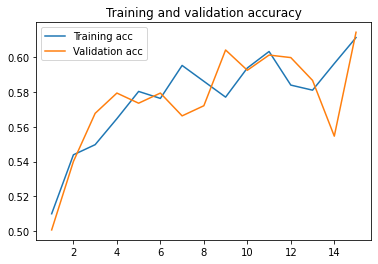

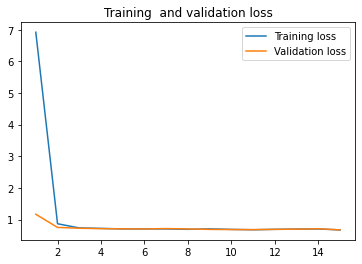

In [47]:
test_loss, test_acc = model.evaluate(np_xtest, np_ytest)

print('Test accuracy:', test_acc)
acc = history.history['accuracy']
#print(history.history.keys())
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training  and validation loss')
plt.legend()
plt.show()

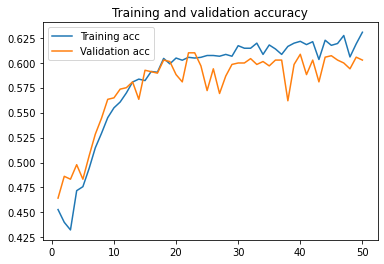

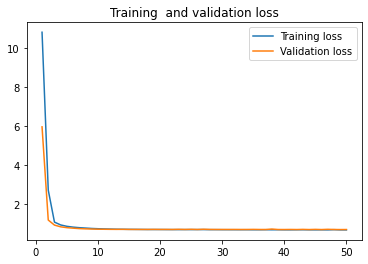

In [ ]:
model.save("mymodel")
#tf.keras.models.save_model(model,filepath= "model")

INFO:tensorflow:Assets written to: mymodel/assets
